In [1]:
input_dir = "/home/julisn/Hamburg/Zwischenergebnisse/cuprates/data"
in_cfg = "config_b20_mu1.0.toml"

plot_dir = "/home/julisn/Hamburg/Zwischenergebnisse/plots_thesis/numerics/sigma/"
cfg = joinpath(input_dir, in_cfg)

"/home/julisn/Hamburg/Zwischenergebnisse/cuprates/data/config_b20_mu1.0.toml"

In [2]:
using Pkg
path = joinpath(abspath(@__DIR__),"..")
Pkg.activate(path)
using LadderDGA
using Plots
using LaTeXStrings, Measures

wp, mP, sP, env, kGridsStr = readConfig(cfg);
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env);

  Activating project at `~/Codes/LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 4
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264735 ?=? 0.25000777915043937 ?≈? 0.2500077791504394 ≟ 0.24999903238559407"


In [3]:
bubble     = calc_bubble(:DMFT, lDGAhelper);
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
λ₀ = calc_λ0(bubble, lDGAhelper);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.05852112957 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.072605336403 ≟ 0
DBG: NOT using diagonal terms in λ₀


In [4]:
res1 = LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd,γd,λ₀,lDGAhelper; fit_μ = false, tc = true, validation_threshold = 1e-8, verbose = true)

Checking λm correction. Sums check χm: -0.0, χd: 0.0
   density p2 = 1.006678(impr.), 1.006498(naive), p1 = 0.998033 (check = false)
   Pauli-Principle p1  = 0.249999
   Pauli-Principle p2  = 0.249999 (check = true)
   Potential Energy p1 = 0.091389
   Potential Energy p2 = 0.126928 (check = false)


λ-correction (type: LadderDGA.LambdaCorrection.mCorrection), converged
λm = 0.09535866777689701, λd = 0.0, μ = 1.0
Epot_1 = 0.09138888993442876, Epot_2 = 0.12692817778715682


In [5]:
res2 = LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd,γd,λ₀,lDGAhelper; fit_μ = true, tc = true, validation_threshold = 1e-8, verbose = true)

Checking λm correction. Sums check χm: -0.0, χd: 0.0
   density p2 = 0.997786(impr.), 0.997473(naive), p1 = 0.998033 (check = false)
   Pauli-Principle p1  = 0.249999
   Pauli-Principle p2  = 0.249999 (check = true)
   Potential Energy p1 = 0.087395
   Potential Energy p2 = 0.126928 (check = false)


λ-correction (type: LadderDGA.LambdaCorrection.mCorrection), converged
λm = 0.095358667776897, λd = 0.0, μ = 0.9862080343225939
Epot_1 = 0.08739483082692348, Epot_2 = 0.1269281777871567


axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:30, indices=0:30))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:60, indices=0:60))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:90, indices=0:90))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:120, indices=0:120))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:150, indices=0:150))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:180, indices=0:180))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.IdOffsetRange(values=0:210, indices=0:210))
axes(Σ_ladder_ti) = (OffsetArrays.IdOffsetRange(values=1:6, indices=1:6), OffsetArrays.Id

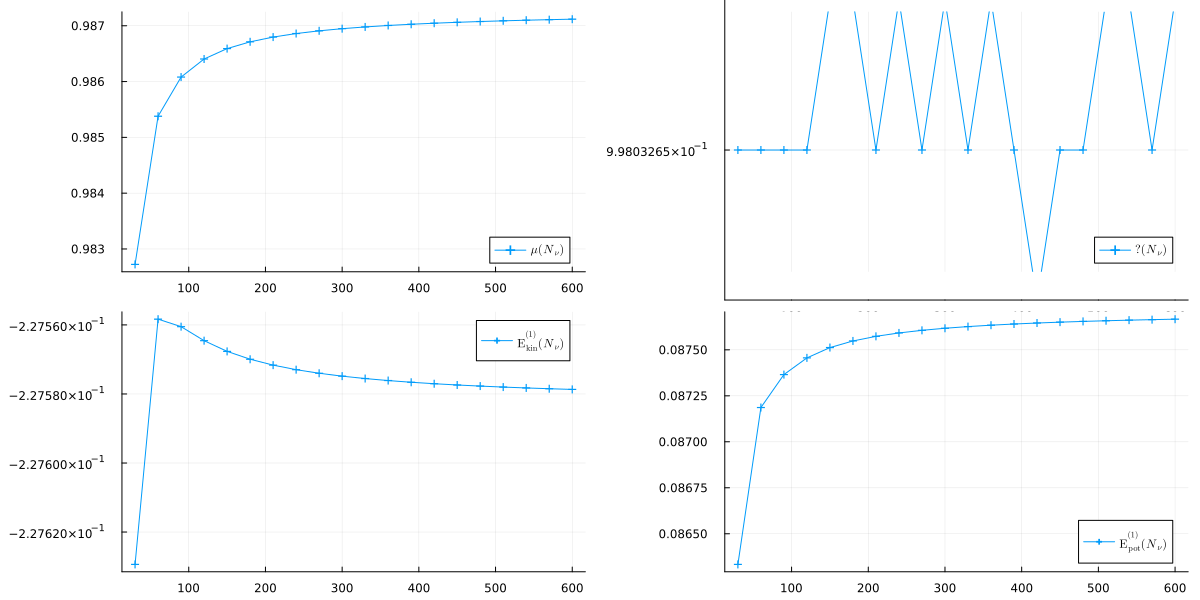

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191


In [38]:
ln = 30:30:600
h = lDGAhelper
res_attach_test = Matrix{Float64}(undef, 5, length(ln))
res_sigma = []
for (i,ii) in enumerate(ln)
    Σ_ladder_ti = attach_Σloc(res2.Σ_ladder, h.Σ_loc, ν_first=min(ii, last(axes(res2.Σ_ladder,2))), ν_last=ii)
    μnew_ti, G_ladder_ti   = G_from_Σladder(Σ_ladder_ti, h.Σ_loc, h.kG, h.mP, h.sP; fix_n = true, νRange=0:ii)
        @show axes(Σ_ladder_ti)
        #@show axes(G_ladder_ti)
    EKin_p1_ti, EPot_p1_ti = calc_E(G_ladder_ti, Σ_ladder_ti, μnew_ti, h.kG, h.mP)
    n_check = filling_pos(G_ladder_ti, h.kG, h.mP.U, μnew_ti, h.mP.β)

    res_attach_test[:,i] = [ii, μnew_ti, n_check, EKin_p1_ti,EPot_p1_ti]
    push!(res_sigma, deepcopy(Σ_ladder_ti))
end
p1 = plot(res_attach_test[1,:], res_attach_test[2,:], label=L"\mu(N_\nu)", markershape=:auto)
p2 = plot(res_attach_test[1,:], res_attach_test[3,:], label=L"\n(N_\nu)", markershape=:auto)
p3 = plot(res_attach_test[1,:], res_attach_test[4,:], label=L"\mathrm{E}^{(1)}_\mathrm{kin}(N_\nu)", markershape=:auto)
p4 = plot(res_attach_test[1,:], res_attach_test[5,:], label=L"\mathrm{E}^{(1)}_\mathrm{pot}(N_\nu)", markershape=:auto)

plot(p1,p2,p3,p4, size=(1200,600))

In [7]:
plot(imag(res2.Σ_ladder[2,30:149]), )
plot!(imag(lDGAhelper.Σ_loc[30:149]))

LoadError: BoundsError: attempt to access 6×100 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:99) with eltype ComplexF64 with indices 1:6×0:99 at index [2, 30:149]

In [8]:
Σ_hartree = lDGAhelper.mP.n * lDGAhelper.mP.U / 2
p1 = plot(;xlims=(50,150), ylims=(-0.0004,0.00), ylabel=L"\Im (\Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Sigma_\mathrm{DMFT})", left_margin=12pt)
p2 = plot(imag(lDGAhelper.Σ_loc[0:149]);xlims=(120,150), ylims=(-0.03,-0.02), label=L"\mathrm{DMFT}", markershape=:none, ylabel=L"\Im \Sigma")
p3 = plot(;xlims=(50,150), ylims=(-0.001,0.001), ylabel=L"\Re (\Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Sigma_\mathrm{DMFT})", left_margin=12pt, legend=:topleft)
p4 = plot(real(lDGAhelper.Σ_loc[0:149]);xlims=(120,150), ylims=(Σ_hartree-0.001,Σ_hartree+0.001), label=L"\mathrm{DMFT}", markershape=:none, ylabel=L"\Re \Sigma", legend=:topleft)
for i in 1:size(res2.Σ_ladder,1)
    plot!(p1, imag(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149]), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:none)
    plot!(p2, imag(res2.Σ_ladder[i,0:149]), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
    plot!(p3, real(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149]), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:none)
    plot!(p4, real(res2.Σ_ladder[i,0:149]), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
end
hline!(p4, [lDGAhelper.mP.n * lDGAhelper.mP.U / 2], label=L"\Sigma_\mathrm{Hartree}", lw=3, ls=:dash)
plot(p1, p2, p3, p4, size=(1200,600))

LoadError: BoundsError: attempt to access 6×100 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:99) with eltype ComplexF64 with indices 1:6×0:99 at index [1, 0:149]

In [9]:
Σ_hartree = lDGAhelper.mP.n * lDGAhelper.mP.U / 2
p1 = plot(;xlims=(50,150), ylims=(0.0000015,0.000003), ylabel=L"\frac{\partial}{\partial \nu} \Im (\Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Sigma_\mathrm{DMFT})", left_margin=12pt, legend=:topleft)
p2 = plot(diff(imag(lDGAhelper.Σ_loc[0:149])); xlims=(120,150), ylims=(-0.001,0.001), label=L"\mathrm{DMFT}", markershape=:none, ylabel=L"\frac{\partial}{\partial \nu}  \Im \Sigma")
p3 = plot(;xlims=(50,150), ylims=(-0.0001,0.0001), ylabel=L"\frac{\partial}{\partial \nu}  \Re \Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Re \Sigma_\mathrm{DMFT}", left_margin=12pt, legend=:topleft)
p4 = plot(diff(real(lDGAhelper.Σ_loc[0:149]));xlims=(120,150), ylims=(-0.0001,0.0001), label=L"\mathrm{DMFT}", markershape=:none, ylabel=L"\frac{\partial}{\partial \nu}  \Re \Sigma", legend=:topleft)
for i in 1:size(res2.Σ_ladder,1)
    plot!(p1, diff(imag(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149])), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:auto)
    plot!(p2, diff(imag(res2.Σ_ladder[i,0:149])), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
    plot!(p3, diff(real(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149])), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:none)
    plot!(p4, diff(real(res2.Σ_ladder[i,0:149])), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
end
#hline!(p4, [lDGAhelper.mP.n * lDGAhelper.mP.U / 2], label=L"\Sigma_\mathrm{Hartree}", lw=3, ls=:dash)
vline!(p1, [75], label="Margin of shifted grid", lw=2, ls=:dash)
vline!(p1, [100])
savefig("")
plot(p1, p2, p3, p4, size=(1200,600))

LoadError: BoundsError: attempt to access 6×100 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:99) with eltype ComplexF64 with indices 1:6×0:99 at index [1, 0:149]

In [10]:
ii = abs.(argmin(diff(diff(imag(res2.Σ_ladder[1,0:149] .- lDGAhelper.Σ_loc[0:149])))))

LoadError: BoundsError: attempt to access 6×100 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:99) with eltype ComplexF64 with indices 1:6×0:99 at index [1, 0:149]

In [11]:
Σ_hartree = lDGAhelper.mP.n * lDGAhelper.mP.U / 2
p1 = plot(;xlims=(50,150), ylims=(-0.0000001,0.0000001), ylabel=L"\frac{\partial^2}{\partial^2 \nu} \Im (\Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Sigma_\mathrm{DMFT})", left_margin=12pt)
p2 = plot(diff(diff(imag(lDGAhelper.Σ_loc[0:149]))); xlims=(50,89), ylims=(-0.00001,0.00001), label=L"\mathrm{DMFT}", markershape=:auto, ylabel=L"\frac{\partial^2}{\partial^2 \nu}  \Im \Sigma")
p3 = plot(;xlims=(50,150), ylims=(-0.00001,0.00001), ylabel=L"\frac{\partial^2}{\partial^2 \nu}  \Re \Sigma_{\mathrm{lD}\Gamma\mathrm{A}} - \Re \Sigma_\mathrm{DMFT}", left_margin=12pt, legend=:topleft)
p4 = plot(diff(diff(real(lDGAhelper.Σ_loc[0:149])));xlims=(50,89), ylims=(-0.00001,0.00001), label=L"\mathrm{DMFT}", markershape=:auto, ylabel=L"\frac{\partial^2}{\partial^2 \nu}  \Re \Sigma", legend=:topleft)
for i in 1:size(res2.Σ_ladder,1)
    plot!(p1, diff(diff(imag(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149]))), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:auto)
    plot!(p2, diff(diff(imag(res2.Σ_ladder[i,0:149]))), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
    plot!(p3, diff(diff(real(res2.Σ_ladder[i,0:149] .- lDGAhelper.Σ_loc[0:149]))), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}", markershape=:auto)
    plot!(p4, diff(diff(real(res2.Σ_ladder[i,0:149]))), label=L"\Sigma_{\mathbf{k}=%$(round.(lDGAhelper.kG.kGrid[i],digits=1))}")
end
#hline!(p4, [lDGAhelper.mP.n * lDGAhelper.mP.U / 2], label=L"\Sigma_\mathrm{Hartree}", lw=3, ls=:dash)
plot(p1, p2, p3, p4, size=(1200,600))

LoadError: BoundsError: attempt to access 6×100 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:99) with eltype ComplexF64 with indices 1:6×0:99 at index [1, 0:149]

In [12]:
Σ_

LoadError: UndefVarError: `Σ_` not defined

In [13]:
kG = lDGAhelper.kG
OffsetMatrix=LadderDGA.OffsetMatrix
νRange = 0:last(axes(res1.G_ladder, 2))
Σloc = lDGAhelper.Σ_loc
Σ_ladder = res1.Σ_ladder
G_new = OffsetMatrix(Matrix{ComplexF64}(undef, size(Σ_ladder, 1), length(νRange)), 1:size(Σ_ladder, 1), νRange)

6×601 OffsetArray(::Matrix{ComplexF64}, 1:6, 0:600) with eltype ComplexF64 with indices 1:6×0:600:
 7.62992e-316+8.48798e-314im  …  3.82302e-318+NaN*im
 7.62994e-316+0.0im              1.39103e-309+0.0im
 7.63066e-316+2.122e-314im       3.82308e-318+2.20477e-319im
 7.63065e-316+2.122e-314im       6.91063e-310+4.45778e-316im
 7.62994e-316+2.122e-314im       7.48657e-316+7.17003e-316im
 7.62993e-316+8.48798e-314im  …  1.39112e-309+5.43231e-312im

In [14]:
n_naive_full = filling(res1.G_ladder, kG, lDGAhelper.mP.β)
for μi in LinRange(-2,2,10)
    GN = G_from_Σ(Σ_ladder, kG, 0:60, lDGAhelper.mP; μ = μi )

@show n_naive_full
n_naive_pos  = filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.U, NaN, lDGAhelper.mP.β; improved_sum=false)
@show n_naive_pos
n_impr_full = filling(res1.G_ladder, kG, lDGAhelper.mP.U, res1.μ, lDGAhelper.mP.β)
@show n_impr_full
n_impr_pos  = filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.U, res1.μ, lDGAhelper.mP.β; improved_sum=true)
@show n_impr_pos
end

LoadError: MethodError: no method matching G_from_Σ(::OffsetArrays.OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::Dispersions.KGrid{Dispersions.cPnn, 2}, ::UnitRange{Int64}, ::ModelParameters; μ::Float64)

[0mClosest candidates are:
[0m  G_from_Σ(::OffsetArrays.OffsetMatrix{ComplexF64, AA} where AA<:AbstractMatrix{ComplexF64}, [91m::Vector{Float64}[39m, ::UnitRange{Int64}, ::ModelParameters; μ, Σloc)
[0m[90m   @[39m [33mLadderDGA[39m [90m~/Codes/LadderDGA.jl/src/[39m[90m[4mGFTools.jl:143[24m[39m
[0m  G_from_Σ([91m::OffsetArrays.OffsetVector{ComplexF64, AA} where AA<:AbstractVector{ComplexF64}[39m, [91m::Vector{Float64}[39m, ::UnitRange{Int64}, ::ModelParameters; μ, Σloc)
[0m[90m   @[39m [33mLadderDGA[39m [90m~/Codes/LadderDGA.jl/src/[39m[90m[4mGFTools.jl:108[24m[39m


In [15]:
@show n_naive_full
n_naive_pos  = filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.U, NaN, lDGAhelper.mP.β; improved_sum=false)
@show n_naive_pos
n_impr_full = filling(res1.G_ladder, kG, lDGAhelper.mP.U, res1.μ, lDGAhelper.mP.β)
@show n_impr_full
n_impr_pos  = filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.U, res1.μ, lDGAhelper.mP.β; improved_sum=true)
@show n_impr_pos
    ndens       = filling_pos(G_ladder, h.kG, h.mP.U, μnew, h.mP.β, improved_sum=true)


n_naive_full = 1.0065174727366133
n_naive_pos = 1.0065174782686044
n_impr_full = 1.0065395592609947
n_impr_pos = 1.0065618015274034


LoadError: UndefVarError: `G_ladder` not defined

In [16]:
lDGAhelper.sP.n_iν

150

In [17]:
filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.β)
filling_pos(res1.G_ladder[:,0:600], kG, lDGAhelper.mP.U, NaN, lDGAhelper.mP.β; improved_sum=false)


1.0065174782686044

In [18]:
μ = LadderDGA.G_from_Σladder!(G_new, res1.Σ_ladder, Σloc, kG, mP, fix_μ=false, μ = μ)
filling_pos(view(G_new, :, 0:last(axes(Σ_ladder, 2))), kG, mP.U, μ, mP.β; improved_sum = improved_sum_filling)


LoadError: UndefVarError: `μ` not defined

In [19]:
improved_sum_filling = true
n = lDGAhelper.mP.n
LadderDGA.G_from_Σ!(G_new, Σ_ladder, kG.ϵkGrid, νRange, mP, μ = μ, Σloc = Σloc)
filling_pos(view(G_new, :, 0:last(axes(Σ_ladder, 2))), kG, mP.U, res1.μ, mP.β; improved_sum = improved_sum_filling)

LoadError: UndefVarError: `μ` not defined

In [20]:
    function fμ(μ::Float64)
        G_from_Σ(G_new, res1.Σ_ladder, kG.ϵkGrid, νRange, mP, μ = μ, Σloc = Σloc)
        filling_pos(view(G_new, :, 0:last(axes(Σ_ladder, 2))), kG, mP.U, μ, mP.β; improved_sum = improved_sum_filling) -  n
    end


fμ (generic function with 1 method)

In [21]:
    νRange = 0:last(axes(G_new, 2))
    length(νRange) < 10 && @warn "fixing ν range with only $(length(νRange)) frequencies!"
    function fμ(μ::Float64)
        G_from_Σladder!(G_new, Σ_ladder, kG.ϵkGrid, νRange, mP, μ = μ, Σloc = Σloc)
        filling_pos(view(G_new, :, 0:last(axes(Σ_ladder, 2))), kG, mP.U, μ, mP.β; improved_sum = improved_sum_filling) -  n
    end

    function fμ_fallback(μ::Float64)
        G_from_Σladder!(G_new, Σ_ladder, kG.ϵkGrid, νRange, mP, μ = μ, Σloc = Σloc)
        filling_pos(view(G_new, :, 0:last(axes(Σ_ladder, 2))), kG, mP.U, μ, mP.β; improved_sum = false) - n
    end

    μ_bak = μ
    μ = if fix_n
        try
            find_zero(fμ, μ_bak, atol = 1e-8) #nlsolve(fμ, [last_μ])
        catch e
            @warn "improved ($improved_sum_filling) μ determination failed. Falling back to naive summation!"
            try
                find_zero(fμ_fallback, μ_bak, atol = 1e-8) #nlsolve(fμ, [last_μ])
            catch e_int
                @warn "μ determination failed with: $e, fallback failed with $e_int"
                return NaN
            end
        end
    else
        μ
    end
    if !isnan(μ)
        G_from_Σladder!(G_new, Σ_ladder, kG.ϵkGrid, νRange, mP, μ = μ, Σloc = Σloc)
    end
    ind_neg = first(axes(G_new, 2)):-1
    G_new[:, ind_neg] = conj.(view(G_new, :, last(axes(G_new, 2))-1:-1:0))


LoadError: UndefVarError: `μ` not defined